In [1]:
# imports
import math
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans


import matplotlib.pyplot as plt


# 1. Amostragem Aleatória Simples
- Desafio: Crie um DataFrame com 1000 registros de alunos, incluindo colunas para
&quot;ID&quot;, &quot;Idade&quot; e &quot;Nota&quot;. Realize uma amostragem aleatória simples de 100 alunos e
analise a média e a mediana das notas da amostra.
- Objetivo: Praticar a amostragem e entender as medidas de tendência central.

In [47]:
dir_dataset = '/home/jovyan/code/dataset/'
dataset = dir_dataset + 'exercicio1_estastitica_.csv'
dataset_study_time = dir_dataset + 'study_time.csv'
dataset_students = dir_dataset + 'alunos.csv'
dataset_income_expenses = dir_dataset + 'income_expenses.csv'
dataset_sales = dir_dataset + 'sales_date.csv'


In [3]:
df = pd.read_csv(dataset)
df

,id,age,score_note
0,1,82,2
1,2,84,2
2,3,42,7
3,4,51,9
4,5,24,6
...,...,...,...
995,996,65,6
996,997,54,1
997,998,71,2
998,999,60,4


In [4]:
df_sample = df.sample(frac=0.1, random_state=33)
df_sample

,id,age,score_note
286,287,34,6
402,403,62,10
253,254,71,6
4,5,24,6
372,373,64,7
...,...,...,...
446,447,77,5
299,300,42,7
165,166,34,4
879,880,36,10


In [5]:
mean_note, median_note = df_sample['score_note'].mean(), df_sample['score_note'].median()
print(f'a media de note na amostra: {mean_note}')
print(f'a mediana de note na amostra: {median_note}')

"""
Quando a  media e a mediana são valores próximos sugere que os dados são aproximandamente simetricos.
A distribuição simetrica, demonstra que os valores estão uniforme proóximo a um ponto central.
"""

a media de note na amostra: 5.79
a mediana de note na amostra: 6.0


'\nQuando a  media e a mediana são valores próximos sugere que os dados são aproximandamente simetricos.\nA distribuição simetrica, demonstra que os valores estão uniforme proóximo a um ponto central.\n'

# 2. Boxplot e Identificação de Outliers
- Desafio: Use o DataFrame criado no desafio anterior e adicione uma coluna &quot;Nota&quot;
com notas variando de 0 a 100. Plote um boxplot para as notas e identifique os
outliers.
- Objetivo: Visualizar a distribuição das notas e entender o conceito de outliers.

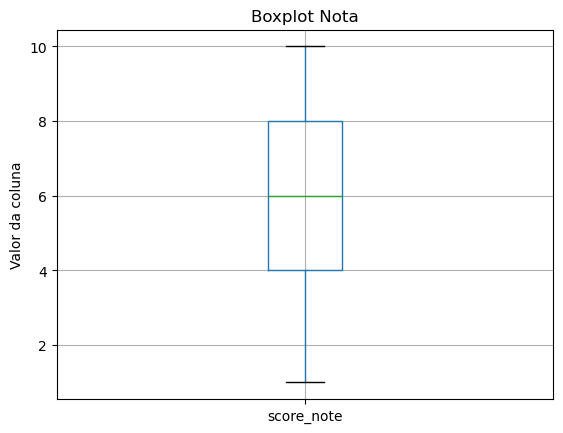

'\nMostra que o valor maximo de nota é 10 e o minimo é 1\nQ3 - 8\nMediana - 6\nQ1 - 4\nCom isso identificamos que a linha da mediana no centro do retangulo onde demonstra uma distribuição\nsimetrica.\n\n50% dos valores estão dentro do retangulo entre q1 e q3\n\nNão observação de outliers\n'

In [6]:
df_sample.boxplot(column='score_note')
plt.title('Boxplot Nota')
plt.ylabel('Valor da coluna')
plt.show()

"""
Mostra que o valor maximo de nota é 10 e o minimo é 1
Q3 - 8
Mediana - 6
Q1 - 4
Com isso identificamos que a linha da mediana no centro do retangulo onde demonstra uma distribuição
simetrica.

50% dos valores estão dentro do retangulo entre q1 e q3

Não observação de outliers
"""

# 3. Histograma para Frequência
- Desafio: Plote um histograma das idades dos alunos do DataFrame anterior,
dividindo as idades em intervalos (bins) apropriados.
- Objetivo: Analisar a frequência das idades e entender a distribuição de dados.

In [7]:
n = len(df_sample)

 o numero de classes é:10.14
 o numero de classes é:15.73
18
84


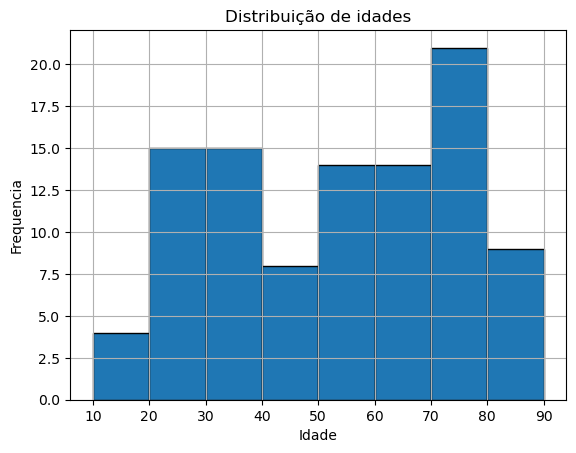

In [8]:
# definir intervalo Regra de sturges
k = 3.5 + math.log2(n)
print(f" o numero de classes é:{k:.2f}")

# definir intervalor Regra de Scott
q3 = np.percentile(df_sample['age'], 75)
q1 = np.percentile(df_sample['age'], 25)
IQR = q3 - q1

k2 = (2 * IQR) / (n ** (1/3))
print(f" o numero de classes é:{k2:.2f}")


min_value = min(df_sample['age'])
print(min_value)
max_value = max(df_sample['age'])
print(max_value)
num_bins = int((max_value - min_value) / k)


                    
bins = [10, 20, 30, 40, 50, 60, 70, 80, 90] 
df_sample['age'].hist(bins=bins, edgecolor='black') # sem especificar os bins a largura dos bins ultrapassa as divisões em 10 e 10. tb não que dizer q menor valor é e o max 90
plt.title('Distribuição de idades')
plt.xlabel('Idade')
plt.ylabel('Frequencia')
plt.show()

4. Cálculo de Covariância
- Desafio: Adicione uma coluna &quot;Horas de Estudo&quot; ao DataFrame anterior. Calcule a
covariância entre &quot;Horas de Estudo&quot; e &quot;Nota&quot;
- Objetivo: Compreender a relação entre duas variáveis.
  

In [9]:
df_study_time = pd.read_csv(dataset_study_time)

df = pd.concat([df, df_study_time], axis=1)
df_sample = df.sample(frac=0.1, random_state=33)
covariance = df_sample['study_time'].cov(df_sample['score_note'])

print(f'A covariancia é: {covariance}')

"""
O valor positivo da covarianca indica que estão positiviamentes relacionadas.
é dificil interpretar apenas o valor da covariançã é indicado utilizar correlação juntas.
"""

A covariancia é: 2.321544444444445


'\nO valor positivo da covarianca indica que estão positiviamentes relacionadas.\né dificil interpretar apenas o valor da covariançã é indicado utilizar correlação juntas.\n'

In [10]:
X = np.array(df['study_time']).reshape(-1,1)
print(X.shape)
print(type(X))


(1000, 1)
<class 'numpy.ndarray'>


In [11]:
y = np.array(df['score_note']).reshape(-1,1)
print(y.shape)
print(type(y))

(1000, 1)
<class 'numpy.ndarray'>


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)

coeff = model.coef_
print(f'coeficiente {coeff}')


coeficiente [[0.0084481]]


In [13]:
y_predict = model.predict(X_test)
print(f'Previsão com regressão')
y_predict

Previsão com regressão


array([[5.78217695],
       [5.7330935 ],
       [5.78893543],
       [5.73850028],
       [5.62622505],
       [5.76333769],
       [5.67556194],
       [5.74677942],
       [5.66204499],
       [5.78226143],
       [5.69668219],
       [5.69237366],
       [5.6859531 ],
       [5.74821559],
       [5.71011467],
       [5.73089699],
       [5.73343142],
       [5.71273358],
       [5.79789041],
       [5.62335269],
       [5.7610567 ],
       [5.61566492],
       [5.72337818],
       [5.69364087],
       [5.71577489],
       [5.71493008],
       [5.73697962],
       [5.62115619],
       [5.68705136],
       [5.78564067],
       [5.77719257],
       [5.71577489],
       [5.68527726],
       [5.72971426],
       [5.67716708],
       [5.73165732],
       [5.60603409],
       [5.62698538],
       [5.6068789 ],
       [5.74230192],
       [5.63915064],
       [5.77845979],
       [5.78724581],
       [5.59910665],
       [5.73064355],
       [5.66136914],
       [5.76882895],
       [5.631

In [14]:
# Evaluate model regression
mse = mean_squared_error(y_test, y_predict)
print(f'Mean Squared Error: {mse}') # baixo media erro quadratico significa melhor performance


Mean Squared Error: 8.317487996943953


In [15]:
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 2.884005547315045


In [16]:
r2 = r2_score(y_test, y_predict)
print("R-squared:", r2)

"""Sugere que a regressão linear não está adequado para os meus dados"""

R-squared: -0.0028534219914098102


'Sugere que a regressão linear não está adequado para os meus dados'

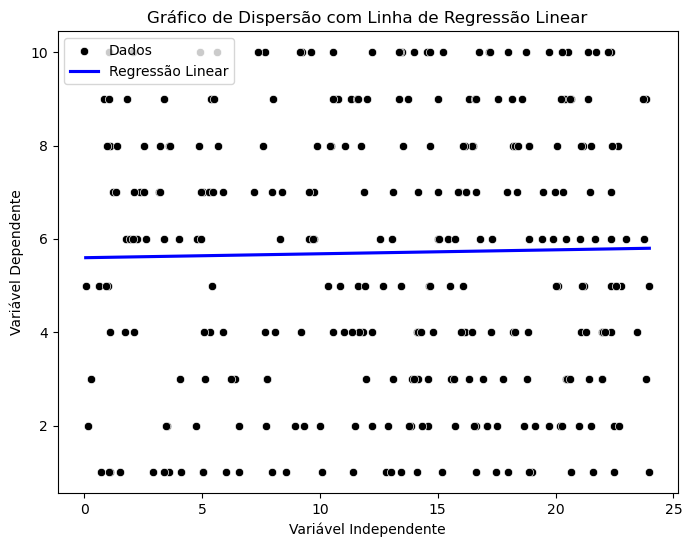

In [17]:
# Plot
import seaborn as sns
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_test.flatten(), y=y_test.flatten(),color='black', label='Dados')
sns.regplot(x=X_test.flatten(), y=y_predict.flatten(), color='blue', scatter=False, label='Regressão Linear')
plt.xlabel('Variável Independente')
plt.ylabel('Variável Dependente')
plt.legend()
plt.title('Gráfico de Dispersão com Linha de Regressão Linear')
plt.savefig('regressao_linear.png')
plt.show()

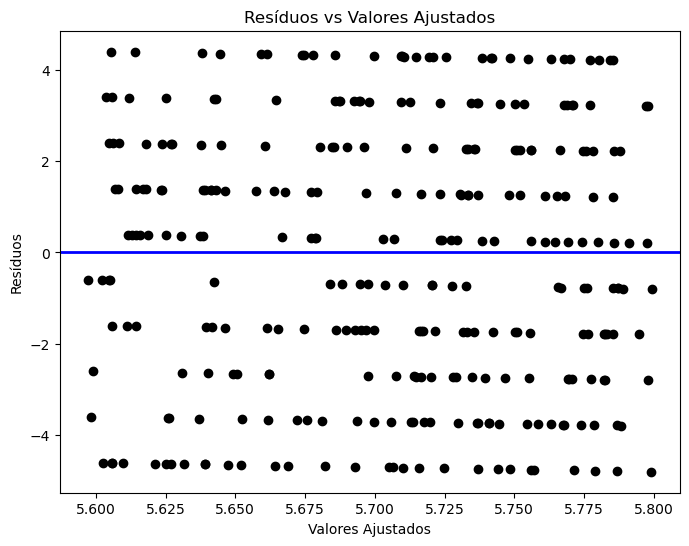

In [18]:
residuos = y_test - y_predict

# Plotando os resíduos
plt.figure(figsize=(8, 6))
plt.scatter(y_predict, residuos, color='black')
plt.axhline(0, color='blue', linewidth=2)
plt.xlabel('Valores Ajustados')
plt.ylabel('Resíduos')
plt.title('Resíduos vs Valores Ajustados')
plt.show()

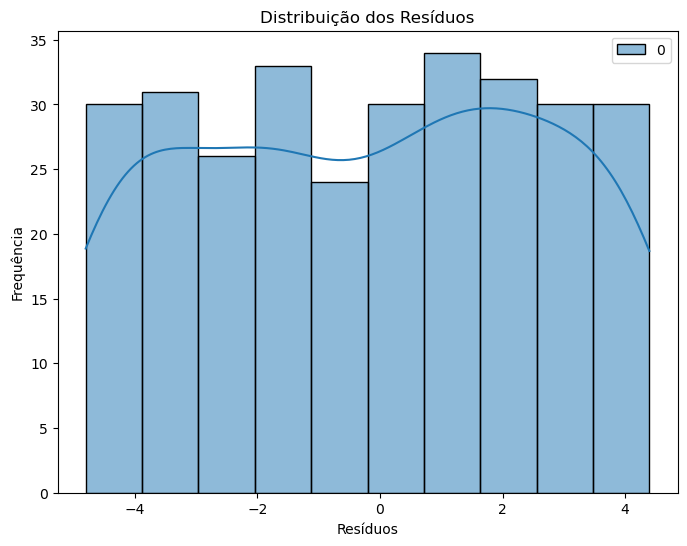

In [19]:
plt.figure(figsize=(8, 6))
sns.histplot(residuos, kde=True, color='black')
plt.title('Distribuição dos Resíduos')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.show()

6. Teste Qui-Quadrado

- Desafio: Crie um DataFrame com a preferência de cursos (por exemplo,
&quot;Matemática&quot;, &quot;Física&quot;, &quot;Química&quot;) entre alunos de diferentes idades. Realize um teste
qui-quadrado para verificar se há associação entre a idade e a preferência de curso.
- Objetivo: Aplicar o teste qui-quadrado para dados categóricos.

In [20]:
from scipy import stats

df_students = pd.read_csv(dataset_students)
df_students

,name,age,curso
0,Catherin Tease,97,Química
1,Karlens Springthorp,26,Matemática
2,Sibel Nourse,61,Química
3,Cory Glasscock,48,Matemática
4,Ash Halsworth,56,Física
...,...,...,...
995,Joaquin Cartman,47,Matemática
996,Domini Amsden,73,Física
997,Holly-anne Whewill,32,Física
998,Ferrell de Tocqueville,25,Matemática


In [21]:
bins = [0, 18, 22, 100]
labels = ['Escolar', 'Academico', 'Pos-Academico']

table = pd.crosstab(df_students['curso'], pd.cut(df_students['age'], bins=bins, labels=labels))
table


age,Escolar,Academico,Pos-Academico
curso,,,
Física,3,15,294
Matemática,1,19,323
Química,3,18,324


In [22]:
chi2, p_value, _, _ = stats.chi2_contingency(table)
print(f"Estatística qui-quadrado: {chi2}, p-valor: {p_value}")

Estatística qui-quadrado: 1.4346107980938814, p-valor: 0.8381577376493096


# 7. K-Means para Agrupamento
- Desafio: Geração de um conjunto de dados com características de clientes (por
exemplo, &quot;Renda&quot; e &quot;Gastos&quot;). Aplique o algoritmo K-Means para agrupar os clientes e
visualize os grupos.
- Objetivo: Entender a técnica de agrupamento e suas aplicações.

In [23]:
df = pd.read_csv(dataset_income_expenses)
df

,name,age,income,expenses
0,Justen Hackworthy,61,1445.91,8210.03
1,Clark Voaden,26,4766.87,6179.26
2,Humfrey Regis,98,4184.83,8038.82
3,Gusta Challis,63,31.49,2499.93
4,Alejandro Shellcross,18,2136.75,5729.10
...,...,...,...,...
995,Nichols Adao,55,9311.51,2676.64
996,Conroy Kneeshaw,80,9062.66,4220.95
997,Ax Large,41,7035.42,1042.66
998,Tate Sirl,84,5881.84,9097.25


In [24]:
X = df [['income', 'expenses']]
kmeans = KMeans(n_clusters=10, random_state=42)
df['cluster'] = kmeans.fit_predict(X)


/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


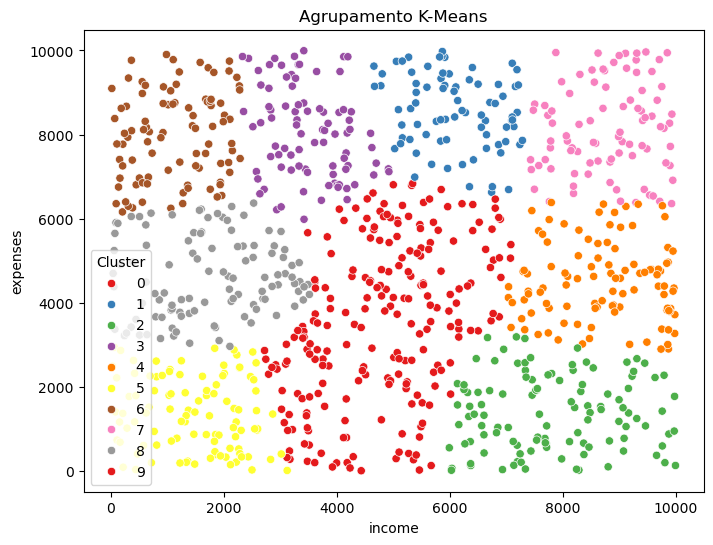

In [25]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='income', y='expenses', hue='cluster', data=df, palette='Set1')
plt.title('Agrupamento K-Means')
plt.xlabel('income')
plt.ylabel('expenses')
plt.legend(title='Cluster')
plt.show()


# 8. Análise de Componentes Principais (PCA)
- Desafio: Use um conjunto de dados multivariados (como o conjunto de dados Iris).
Aplique PCA e visualize os primeiros dois componentes principais.
- Objetivo: Reduzir a dimensionalidade dos dados e explorar suas variáveis.

In [26]:
from sklearn import datasets

iris = datasets.load_iris()

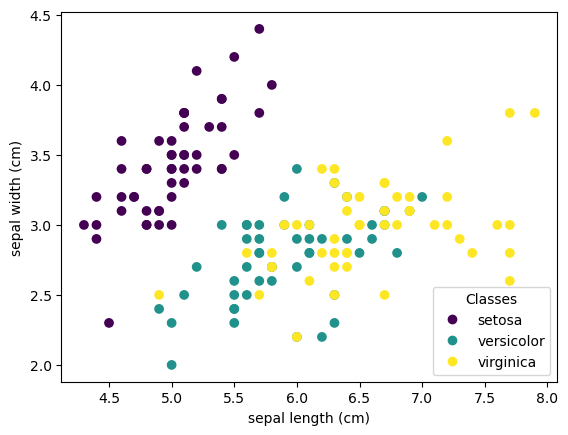

In [27]:
import matplotlib.pyplot as plt

_, ax = plt.subplots()

scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)

ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])

_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"

)
plt.show()

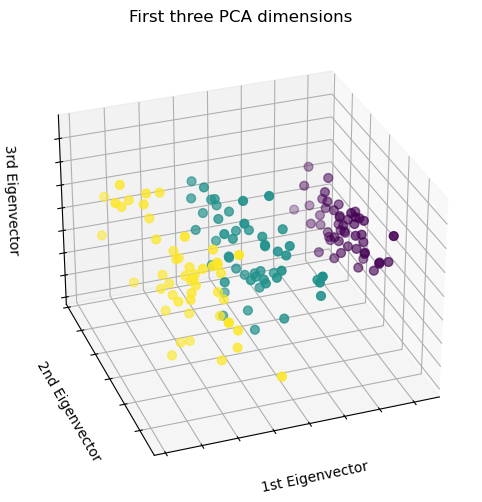

In [31]:
# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401

from sklearn.decomposition import PCA

fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=iris.target,
    s=40,
)

ax.set_title("First three PCA dimensions")
ax.set_xlabel("1st Eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd Eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd Eigenvector")
ax.zaxis.set_ticklabels([])

plt.show()

# 9. Distribuição Binomial
- Desafio: Simule uma situação em que você realiza 10 tentativas de um experimento
com uma probabilidade de sucesso de 0,3. Calcule e visualize a distribuição binomial
para 0 a 10 sucessos.
- Objetivo: Entender e aplicar a distribuição binomial.

In [44]:
from scipy.stats import binom

n = 10 # numero de tentativas
p = 0.3 # probabilidade sucesso quanto mais se aproxima para 5 mais simetrico o a distriubuição se comporta

x = np.arange(0, n+1)
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [45]:
prob = binom.pmf(x, n, p)
prob

array([2.82475249e-02, 1.21060821e-01, 2.33474441e-01, 2.66827932e-01,
       2.00120949e-01, 1.02919345e-01, 3.67569090e-02, 9.00169200e-03,
       1.44670050e-03, 1.37781000e-04, 5.90490000e-06])

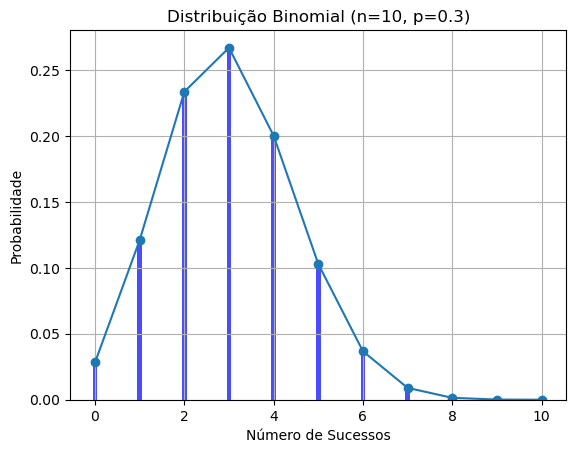

'\nO gráfico em formato de sino mostra que há uma distribuiçõa normal  \n'

In [46]:
plt.plot(x, prob, 'o-')
plt.bar(x, prob, width=0.1, color='b', alpha=0.7)
plt.title('Distribuição Binomial (n=10, p=0.3)')
plt.xlabel('Número de Sucessos')
plt.ylabel('Probabilidade')
plt.grid(True)
plt.savefig('distribuicao.png')
plt.show()

"""
O gráfico em formato de sino mostra que há uma distribuiçõa normal  
"""

# 10. Análise de Séries Temporais
- Desafio: Crie uma série temporal simulada de vendas mensais de um produto ao
longo de dois anos. Plote os dados e analise a tendência.
- Objetivo: Aprender a manipular e analisar dados de séries temporais.

In [61]:
df = pd.read_csv(dataset_sales)

df.set_index('date', inplace=True)
df.head()


,sales
date,
2021/10/01,448
2020/04/18,334
2022/09/23,419
2022/12/27,665
2020/03/14,784


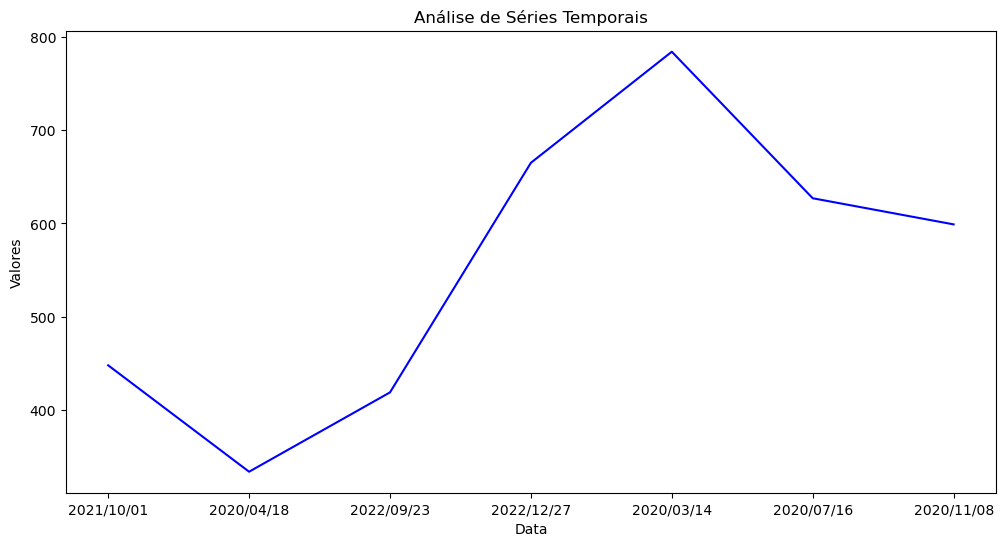

In [65]:
plt.figure(figsize=(12, 6))
plt.plot(df.head(7), color='blue')
plt.title('Análise de Séries Temporais')
plt.xlabel('Data')
plt.ylabel('Valores')
plt.show()

"""
Verficando

## Referencia
- https://statistics.laerd.com/statistical-guides/understanding-histograms.php
- 